# Statistical Thinking in Python (Part 1)

## Table of Contents  
* [Chapter 1. Graphical EDA](#first-bullet)
* [Chapter 2. Quantitative EDA](#second-bullet)
* [Chapter 3. Thinking Probabilistically: Discrete Variables](#third-bullet)
* [Chapter 4. Thinking Probabilistically: Continuous Variables](#fourth-bullet)
* [Chapter 5. Final Thoughts](#fifth-bullet)

---
## Chapter 1. Graphical EDA<a class="anchor" id="first-bullet"></a>
---

Yogi Berra said, "You can observe a lot by watching." The same is true with data. If you can appropriately display your data, you can already start to draw conclusions from it. I'll go even further. Exploring your data is a crucial step in your analysis.

## Tuky's comment on exploratory data analysis
When I say exploring your data, I mean organizing and plotting your data, and maybe computing a few numerical summaries about them. This idea is known as exploratory data analysis, or EDA, and was developed by one of the greatest statisticians of all time, John Tukey. He wrote a book entitled Exploratory Data Analysis in 1977 where he laid out the principles. In that book, he said,  
> **"Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."**

I wholeheartedly agree with this, so we will begin our study of statistical thinking with EDA. Let's consider an example.

In [48]:
# Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Importing the datasets
all_states = pd.read_csv('datasets/2008_all_states.csv')
swing_states = pd.read_csv('datasets/2008_swing_states.csv')

## 2008 US swing state election results 
Here, we have a data set from [Data.gov](https://www.data.gov/) containing the election results of 2008 at the county level in each of the three major swing states of Pennsylvania, Ohio, and Florida. Those are the ones that largely decide elections in the US. 

In [49]:
swing_states[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


## Plot the results with a histogram
We take the Democratic share of the vote in the counties of all of the three swing states and plot them as a histogram. We can plot this as a histogram using the `matplotlib.pyplot` module's hist function. The height of each bar is the number of counties that had the given level of support for Obama. For example, the tallest bar is the number of counties that had between 40% and 50% of its votes cast for Obama. Right away, because there is more area in the histogram to the left of 50%, we can see that more counties voted for Obama's opponent, John McCain, than voted for Obama. Look at that. Just by making one plot, we could already draw a conclusion about the data, which would have been extraordinarily tedious by hand counting in the DataFrame.

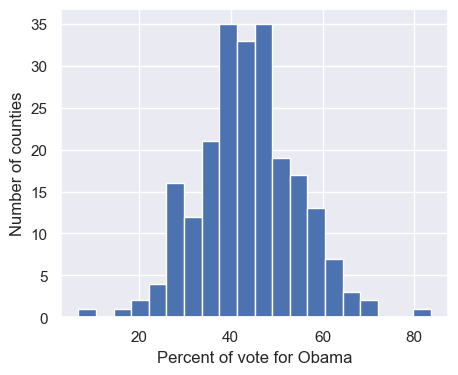

In [128]:
# Set default Seaborn style
sns.set()

fig = plt.figure(figsize=(5, 4))

plt.hist(swing_states['dem_share'], bins=20) # Alternatively, we can change the bin size as e.g. bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')
plt.show()

## Drawback of histograms and Bee swamp plots

The histogram of county-level election data was informative. We learned that more counties voted for McCain than for Obama. However, **a major drawback of using histograms** is that   
1. **the same data set can look different depending on how the bins are chosen.** And choice of bins is in many ways arbitrary. This leads to **binning bias**; you might interpret your plot differently for two different choices of bin number.  
2. An additional problem with histograms is that we are not plotting all of the data. That is, **we are sweeping the data into bins, and losing their actual values.**

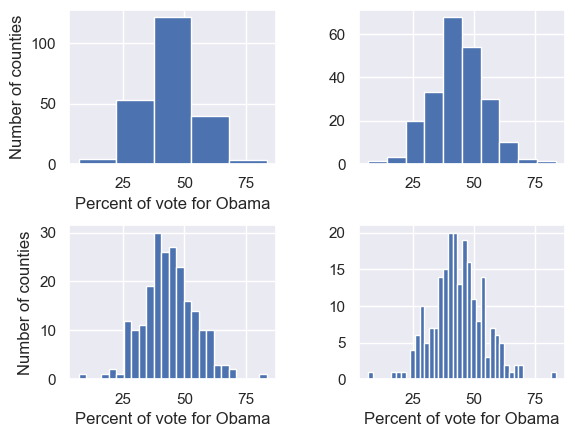

In [51]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
plt.hist(swing_states['dem_share'], bins=5)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

ax = fig.add_subplot(2, 2, 2)
plt.hist(swing_states['dem_share'], bins=10)

ax = fig.add_subplot(2, 2, 3)
plt.hist(swing_states['dem_share'], bins=25)
plt.xlabel('Percent of vote for Obama')
plt.ylabel('Number of counties')

ax = fig.add_subplot(2, 2, 4)
plt.hist(swing_states['dem_share'], bins=40)
plt.xlabel('Percent of vote for Obama')

plt.show()

## Remedy: Bee swarm plot  
To remedy these problems we can make a bee swarm plot, also called a swarm plot. This is best shown by example. Here is a beeswarm plot of the vote totals in the three swing states. Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precise location along the x-axis is unimportant. Notably, we no longer have any binning bias and all data are displayed. This plot may be conveniently generated using Seaborn. A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation. In this case, an observation is a county, and the features are state and the Democratic share of the vote.

### Generating a bee swarm plot  
A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation. In this case, an observation is a county, and the features are state and the Democratic share of the vote. To make the plot, you need to specify which column gives the values for the y-axis, in this case the share of the vote that went to the Democrat Barack Obama, and the values for the x-axis, in this case the state. And of course, you need to tell it which DataFrame contains the data.

### 2008 US swing state election results
From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states. This time it is more detailed than a histogram, but without too much added visual complexity.

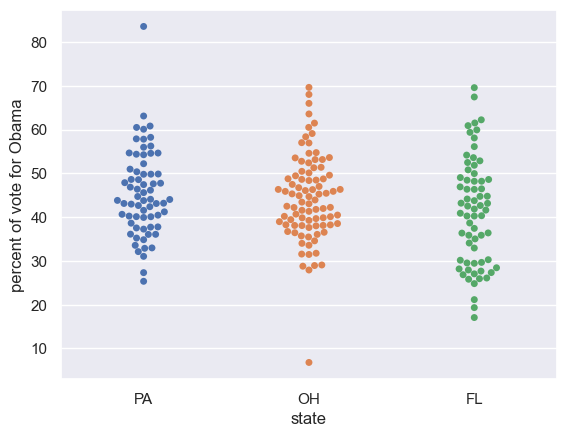

In [52]:
# Set default Seaborn style
sns.set()

sns.swarmplot(x='state', y='dem_share', data= swing_states, hue="state")
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.legend([],[], frameon=False)
plt.show()

## Limited efficiency of swarm plots
We saw in the above plot the clarity of bee swarm plots. However, there is a limit to their efficacy. For example, imagine we wanted to plot the county-level voting data for all states divided as east of the Mississippi River and all states west.  

### 2008 US election results: East and West
We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi. The bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option.  

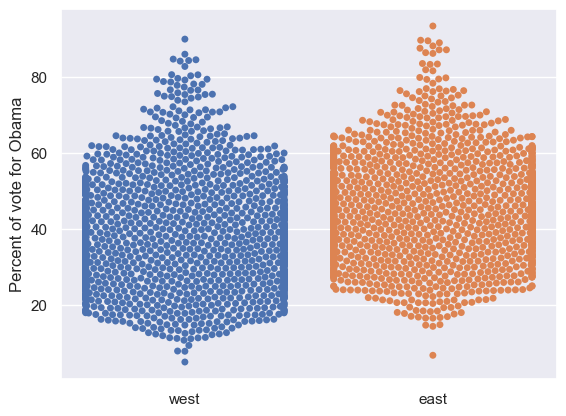

In [53]:
sns.swarmplot(x='east_west', y='dem_share', data= all_states, hue='east_west')
plt.ylabel('Percent of vote for Obama')
plt.xlabel('')
plt.legend([],[], frameon=False)
plt.show()

## Empirical cumulative distribution function (ECDF)
As an alternative, we can compute an empirical cumulative distribution function, or ECDF. Again, this is best explained by example. Here is a picture of an ECDF of the percentage of swing state votes that went to Obama. 

* The **x-value** of an ECDF: **the quantity you are measuring**, in this case the percent of vote that sent to Obama. 
* The **y-value**: **the fraction of data points that have a value *"smaller"* than the corresponding x-value.**

For example, 20% of counties in swing states had 36% or less of its people vote for Obama. Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.  

In [54]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

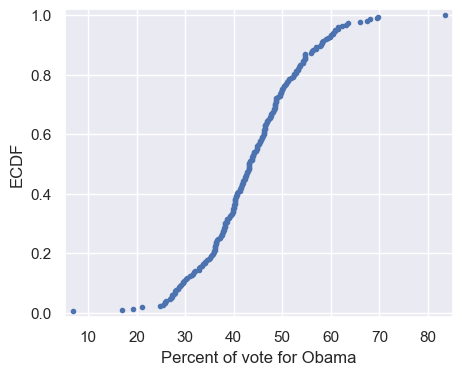

In [129]:
x, y = ecdf(swing_states['dem_share'])
fig = plt.figure(figsize=(5, 4))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

## 2008 US swing state election ECDF
Let's look at how to make one of these from our data. The x-axis is the sorted data. We need to generate it using the NumPy function sort, so we need to import Numpy, which we do using the alias np as is commonly done. The we can use `np.sort` to generate our x-data. The y-axis is evenly spaced data points with a maximum of one, which we can generate using the `np.arange` function and then dividing by the total number of data points. Once we specify the x and y values, we plot the points. By default, `plt.plot` plots lines connecting the data points. To plot our ECDF, we just want points. To achieve this we pass the string period and the string 'none' to the keywords arguments marker and linestyle, respectively. Finally, we use the `plt.margins` function to make sure none of the data points run over the side of the plot area. Choosing a value of point-02 gives a 2% buffer all around the plot.

## Multiple ECDFs
We can also easily plot multiple ECDFs on the same plot. For example, here are the ECDFs for the three swing states. We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties. *In my workflow, I almost always plot the ECDF first. It shows all the data and gives a complete picture of how the data are distributed.*

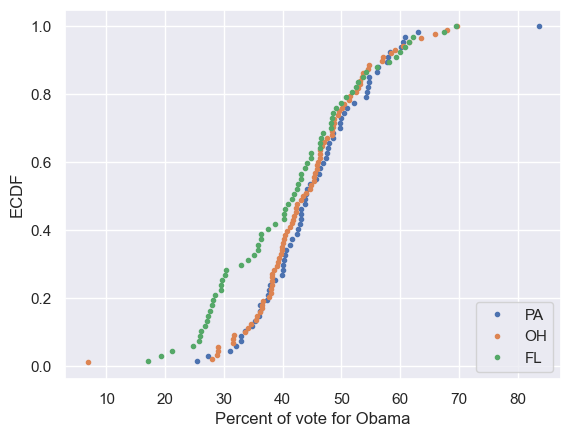

In [56]:
# Compute ECDFs
x_pa, y_pa = ecdf(swing_states[swing_states['state'] == 'PA']['dem_share'])
x_oh, y_oh = ecdf(swing_states[swing_states['state'] == 'OH']['dem_share'])
x_fl, y_fl = ecdf(swing_states[swing_states['state'] == 'FL']['dem_share'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_ = plt.plot(x_fl, y_fl, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('PA', 'OH', 'FL'), loc='lower right')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')

# Display the plot
plt.show()

## Onward toward the whole story!
You now have some great graphical EDA tools. You can quickly generate and investigate a histogram. You can immediately get a feel for your data by plotting all of them, with bee swarm plots or ECDFs. In almost every data set we encounter in this course, and in its sequel, and also in real life, we start with graphical EDA. Remember what Tukey said,

> “Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.” — John Tukey

### Coming up
In the next chapter, we will build upon graphical EDA with quantitative EDA, which allows you to compute useful summary statistics. With our foundation stone in place, we will spend the last half of this course learning to **think probabilistically.** We will learn about **probability distributions for both discrete and continuous variables**, which provide the mathematical foundation for you to draw meaningful conclusions from your data. We will not get mired in mathematical details, but rather will unleash **the power of the NumPy random module to use hacker statistics** in order to simulate the probabilistic stories and distributions that we encounter. We will find that by writing a few lines of Python code, we can perform even putatively complicated statistical analyses. As we work through this course and its sequel, we will grow ever closer to being able to tell what Tukey calls **"the whole story."**

---
## Chapter 2. Quantitative Exploratory Data Analysis<a class="anchor" id="second-bullet"></a>
---

## Introduction to summary statistics: The sample mean and median  
We have seen that histograms, bee swarm plots, and ECDFs provide effective summaries of data. But we often would like to summarize data even more succinctly, say in one or two numbers. These numerical summaries are not by any stretch a substitute for the graphical methods we have been employing, but they do take up a lot less real estate.

Let's go back to the election data from the swing states again. **If we could summarize the percentage of the votes for Obama at the county level in Pennsylvania in one number, what would we choose?** **The first number that pops into my mind is the mean.** The mean for a given state is just the average percentage of votes over the counties. If we add the means as horizontal lines to the bee swarm plot, we see that they are a reasonable summary of the data.  

## Mean vote percentage
To compute the mean of a set of data, we use the `np.mean` function, here used to compute the mean county-level vote for Obama in Pennsylvania. To put it precisely, the mean, written here as x-bar,is the sum of all the data, divided by the number n of data points.  
$$mean = \bar{x} = {1 \over n} \sum_{i=1}^n x_{i}$$
* **Major problem of the mean**: it is heavily influenced by outliers, or data points whose value is far greater or less than the most of the rest of the data

Now, the mean is a useful statistic and easy to calculate, but **a major problem is that it is heavily influenced by outliers, or data points whose value is far greater or less than most of the rest of the data.**   

## 2008 Utah election results
Consider the county-level votes for Utah in the 2008 election. There are five counties that have high vote share for Obama, one of which has almost 60%. Even though the majority of the counties in Utah had less than 25% voting for Obama, these anomalous counties pull the mean higher up. So, when we compute the mean, we get about 28%. We might like a summary statistic that is immune to extreme data.

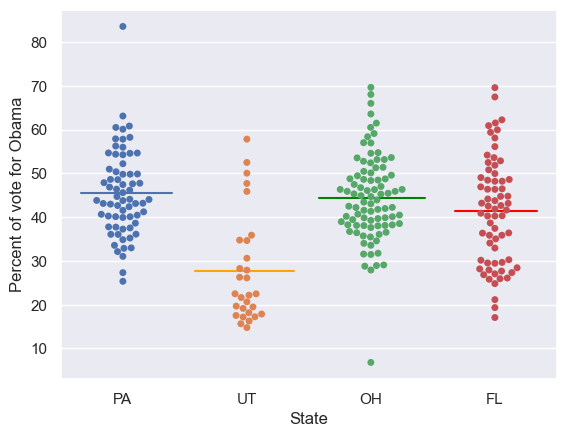

In [57]:
df = all_states[['state','county','dem_share']]
df = df[(df["state"] == "PA") | (df["state"] == "OH") | (df["state"] == "FL") | (df["state"] == "UT")]

graph = sns.swarmplot(x='state', y='dem_share', data= df, hue="state")

# Calculate the mean by each state and add the mean lines on the plot
graph.axhline(np.mean(df[df['state'] == 'PA']['dem_share']), xmin=0.040, xmax= 0.225)
graph.axhline(np.mean(df[df['state'] == 'UT']['dem_share']), xmin=0.270, xmax=0.470, color='orange')
graph.axhline(np.mean(df[df['state'] == 'OH']['dem_share']), xmin=0.520, xmax=0.735, color='green')
graph.axhline(np.mean(df[df['state'] == 'FL']['dem_share']), xmin=0.795, xmax=0.96, color='red')
plt.xlabel('State')
plt.ylabel('Percent of vote for Obama')
plt.legend([],[], frameon=False)

plt.show()

## The median: immune to extreme data (outliers)
The median provides exactly that. **The median is the middle value of a data set.** It is defined by how it is calculated: 1) sort the the data and 2) choose the datum in the middle. Because it is derived from the ranking of sorted data, and not on the values of the data, the median is immune to data that take on extreme values. Here it is displayed on the bee swarm plot. It is not tugged up by the counties with large fraction of votes for Obama. The median is computed by simply calling the `np.median` function.

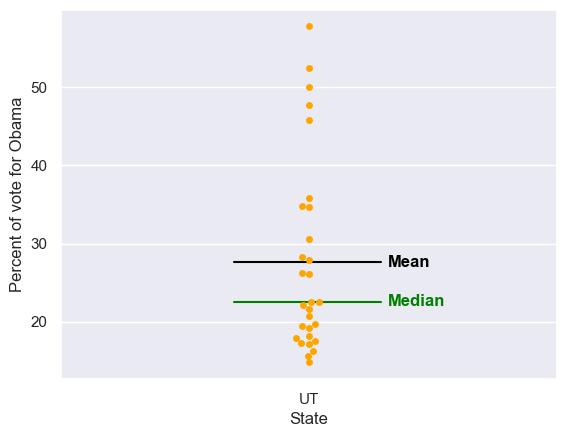

In [58]:
graph = sns.swarmplot(x='state', y='dem_share', data= df[df["state"] == "UT"], color="orange")

# Calculate the mean by each state and add the mean lines on the plot
graph.axhline(np.mean(df[df['state'] == 'UT']['dem_share']), xmin=0.35, xmax= 0.645, color='black')
graph.axhline(np.median(df[df['state'] == 'UT']['dem_share']), xmin=0.35, xmax= 0.645, color='green')

plt.text(0.16, 27,"Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.16, 22,"Median", horizontalalignment='left', size='medium', color='green', weight='semibold')

plt.xlabel('State')
plt.ylabel('Percent of vote for Obama')
plt.legend([],[], frameon=False)

plt.show()

## Percentiles, outliers, and box plots
**The median is a special name for the 50th percentile**; that is 50% of the data are less than the median. Similarly, the 25th percentile is the value of the data point that is greater than 25% of the sorted data, and so on for any other percentile we want. Percentiles are useful summary statistics, and can be computed using `np.percentile`. We just pass a list of the percentiles we want (percentiles, not fractions), and it returns the data that match those percentiles.   
<br>
We can do this for all of the swing states. Let's compute the 25th, 50th, and 75th percentiles. We now have three summary statistics. Now the whole point of summary statistics was to keep things concise, but we're starting to get a lot of numbers here. Dealing with this issue is where quantitative EDA meets graphical EDA.

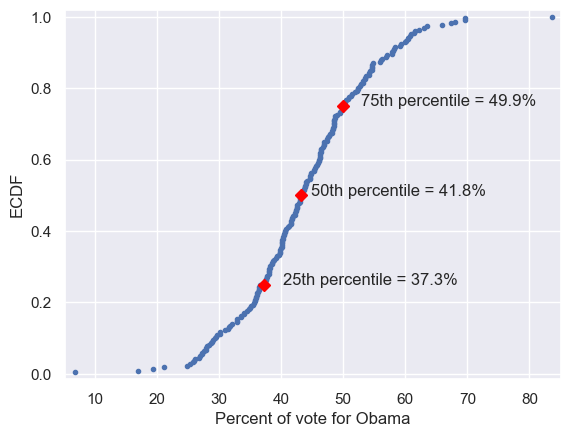

In [59]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(swing_states['dem_share'], percentiles)

# Plot the ECDF
x, y = ecdf(swing_states['dem_share'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color ='red', linestyle = 'none')

plt.annotate("25th percentile = 37.3%", (37.3+ 3, 0.25))
plt.annotate("50th percentile = 41.8%", (41.8+ 3, 0.5))
plt.annotate("75th percentile = 49.9%", (49.9+ 3, 0.75))

# Show the plot
plt.show()

## 2008 US election box plot
**Box plots** were invented by John Tukey himself to display some of the salient features of a data set based on percentiles. Here, we see a box plot showing Obama's vote share from states east and west of the Mississippi River. 
* The center of box is the median, which we know is the 50th percentile of the data. 
* The edges of the boxes are the 25th and 75th percentile. 
* The total height of the box contains the middle 50% of the data, and is called the interquartile range, or IQR. 
* The whiskers extend a distance of 1.5 times the IQR, or to the extent of the data, whichever is more extreme. 
* Finally, any points outside of the whiskers are plotted as individual points, which we often demarcate as outliers. 

While there is no single definition for an outlier, being more than 2 IQRs away from the median is a common criterion. It is important to remember that an outlier is not necessarily an erroneous data point. You should not assume an outlier is erroneous unless you have some known reason to. Since there is zero evidence of any substantial voter fraud in the United States, these outliers are not erroneous. They are just data points with extreme values. When the number of data are very large and bee swarm plots are too cluttered, box plots are a great alternative. It makes sense, then, that constructing a box plot using `Seaborn` is exactly the same as making a bee swarm plot; we just use `sns .boxplot`. And of course we never forget to label the axes.

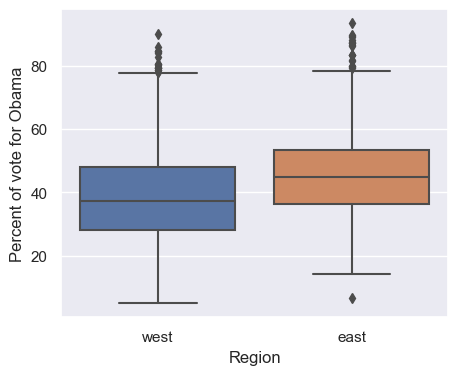

In [155]:
# Create a boxplot for the west and the east 
fig = plt.figure(figsize=(5, 4))
_ = sns.boxplot(x='east_west', y='dem_share', data= all_states)
_ = plt.xlabel('Region')
_ = plt.ylabel('Percent of vote for Obama')

## Variance and standard deviation
Once again, let's look at the 2008 swing state data on the county level and think about other summary statistics we can calculate. In the bee swarm plot, I also show the means of each state with a horizontal line. In looking at this plot, **the mean seems to capture the magnitude of the data, but what about the *variability, or the spread, of the data?***  Florida seems to have more county-to-county variability than Pennsylvania or Ohio.

## Computing the variance 
We can quantify this spread with the variance. **The variance is the average of the squared distance from the mean.** 
$$variance = {1 \over n} \sum_{i=1}^n (x_{i} - \bar{x})^2$$

That definition was a mouthful. Let's parse that more carefully with a graphical example, looking specifically at Florida. For each data point, we square the distance from the mean, and then take the average of all of these values. Calculation of the variance is implemented in the `np.var` function. Now, **because the calculation of the variance involves squared quantities, it does *not have the same units of what we have measured*, in this case the vote share for Obama.** Therefore, we are interested in the square root of the variance.

Variance with np.var: 147.44
Explicit variance: 147.44


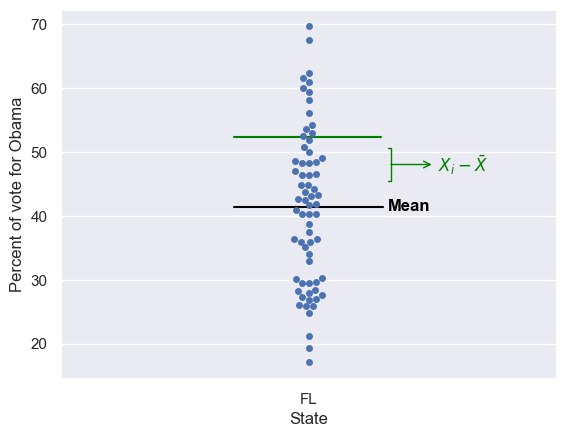

In [133]:
# Compute the explicit variance and the numpy variance 
mean = np.mean(df[df['state'] == 'FL']['dem_share'])
variance = np.var(df[df['state'] == 'FL']['dem_share'])

# Array of differences to mean: differences
df_fl = df[df['state'] == 'FL']['dem_share'] 
differences = df_fl - np.mean(df_fl)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Print the result
print(f'Variance with np.var: {variance:.2f}\nExplicit variance: {variance_explicit:.2f}')

graph = sns.swarmplot(x='state', y='dem_share', data= df[df["state"] == "FL"])

# Ad the mean line on the plot
graph.axhline(mean, xmin=0.35, xmax= 0.65, color='black')
graph.axhline(mean+11, xmin=0.35, xmax= 0.645, color='green')

plt.text(0.16, mean-0.5, "Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.annotate(r"$X_i- \bar{X}$ ", xy=(0.16, 48), xytext=(0.26, 48) , color='green', va="center", ha="left", arrowprops=dict(arrowstyle="<-[", color="green"))

plt.xlabel('State')
plt.ylabel('Percent of vote for Obama')
plt.legend([],[], frameon=False)

plt.show()

## Computing the standard deviation
The square root of the variance is called the **standard deviation.** 
$$\text{standard deviation} = \sqrt{variance} = \sqrt{{1 \over n} \sum_{i=1}^n (x_{i} - \bar{x})^2}$$
This is calculated with the `np.std` function, and the results are the same as taking the square root of the variance. When we look at the swarm plot, **it is clear that the standard deviation is a reasonable metric for the typical spread of the data.**

Mean: 41.32507462686567 Variance: 147.44278618846067 Standard deviation: 12.142602117687158


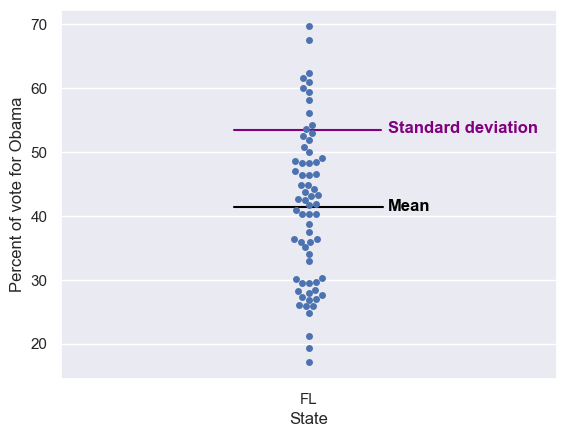

In [62]:
# Compute the standard deviation 
std = np.std(df[df['state'] == 'FL']['dem_share'])

# Print the results
print('Mean:', mean,'Variance:', variance, 'Standard deviation:', std)

graph = sns.swarmplot(x='state', y='dem_share', data= df[df["state"] == "FL"])

# Ad the mean and the standard deviation lines on the plot
graph.axhline(mean, xmin=0.35, xmax= 0.65, color='black')
graph.axhline(mean+std, xmin=0.35, xmax= 0.645, color='purple')

plt.text(0.16, mean-0.5, "Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0.16, mean+std-0.5, "Standard deviation", horizontalalignment='left', size='medium', color='purple', weight='semibold')

plt.xlabel('State')
plt.ylabel('Percent of vote for Obama')
plt.legend([],[], frameon=False)

plt.show()


## Covariance and the Pearson correlation coefficient

We have more data than just the vote share for Obama. We also know *the total number of votes in each county*. Let's look at **how these two quantities vary together.**  

## 2008 US swing state election results
We start by looking at a scatter plot of the county data for the three swing states, plotting **the percent vote for Obama versus the total number of votes in each county.** Immediately from the scatter plot, we see that *the twelve most populous counties all voted for Obama (blue box)*, and *that most of the counties with small populations voted for McCain (red box).*

### Generating a scatter plot
To generate a scatter plot, we plot the data as points by setting the marker and `linestyle` keyword arguments of `plt.plot`. So, we have exposed another graphical EDA technique: scatter plots! We would like to have a summary statistic to go along with the information we have just gleaned from the scatter plot. **We want a number that summarizes *how Obama's vote share varies with the total vote count.*** One such statistic is **the covariance.**

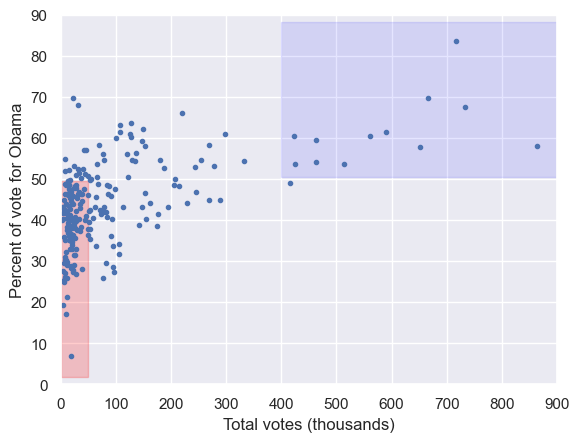

In [63]:
# Adjust the range and the interval of x-axis and y-axis
plt.xlim(0, 900, 100)
plt.ylim(0, 90, 10)
plt.yticks(range(0, 91, 10))

# Add boxes to show favorable areas for Obama and for McCain
plt.axvspan(0, 50, ymin=0.02, ymax=0.55, alpha=0.2, color='red')
plt.axvspan(400, 900, ymin=0.56, ymax=0.98, alpha=0.1, color='blue')

# Create a scatter plot
_ = plt.plot(swing_states['total_votes']/1000, swing_states['dem_share'], marker='.', linestyle='none')
_ = plt.xlabel('Total votes (thousands)')
_ = plt.ylabel('Percent of vote for Obama')

## Covariance
To understand where it comes from, let's annotate the scatter plot with the means of the two quantities we are interested in. Now let's look at **this data point, from Lucas County, Ohio**. This data point differs from the mean vote share for Obama, and the mean total votes. We can compute these differences for each data point. The covariance is the mean of the product of these differences. 

$$covariance = {1 \over n} \sum_{i=1}^n (x_{i} - \bar{x})(y_{i} - \bar{y})$$

* **Positively correlated**: If $x$ and $y$ **both** tend to be above, or **both** below their respective means together, as they are in this data set, then the covariance is positive. This means that they are positively correlated: when $x$ is high, so is $y$; **when the county is *populous*, it has *more votes for Obama.***
* **Negatively correlated**: Conversely, if $x$ is high while $y$ is low, the covariance is negative, and the data are negatively correlated, or anticorrelated, which is not the case for this data set.

We can compute the covariance using built-in NumPy functions. However, if we want to have a more generally applicable measure of how two variables depend on each other, **we want it to be *dimensionless*, that is to *not have any units.***

''

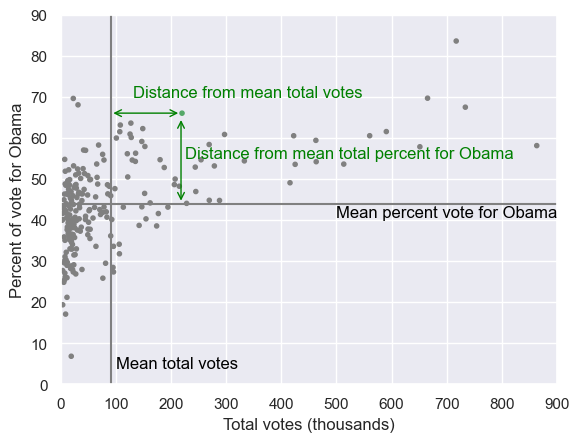

In [64]:
# Adjust the range and the interval of x-axis and y-axis
plt.xlim(0, 900, 100)
plt.ylim(0, 90, 10)
plt.yticks(range(0, 91, 10))

# Create a scatter plot
colors = ["g" if county == 'Lucas County' else "grey" for county in swing_states['county']]
plt.scatter(swing_states['total_votes']/1000, swing_states['dem_share'], marker='.', color=colors)
plt.xlabel('Total votes (thousands)')
plt.ylabel('Percent of vote for Obama')

# Add the lines to show the mean percent for Obama and the mean total votes 
plt.axvline(np.mean(swing_states['total_votes'])/1000, color='grey') # mean total votes
plt.axhline(np.mean(swing_states['dem_share']), color='grey'); # mean percent for Obama

# Add arrows to show the distance between Lucas county and the means 
plt.annotate("", xy=(90, 66), xytext=(218, 66) , color='green', va="center", ha="left", arrowprops=dict(arrowstyle="<->", color="green"))
plt.annotate("",xy=(218, 44), xytext=(218, 65), color='green', arrowprops=dict(arrowstyle="<->", color="green"), ha="center", va="bottom")

plt.text((np.mean(swing_states['total_votes'])/1000)+10, 4, "Mean total votes", horizontalalignment='left', size='medium', color='black')
plt.text(500, np.mean(swing_states['dem_share'])-3, "Mean percent vote for Obama", horizontalalignment='left', size='medium', color='black')
plt.text(130, 70, "Distance from mean total votes", horizontalalignment='left', size='medium', color='green')
plt.text(225, 55, "Distance from mean total percent for Obama", horizontalalignment='left', size='medium', color='green')
;

## Pearson correlation coefficient
We can **divide the covariance by the standard deviations of the x and y variables**. This is called the **Pearson correlation coefficient**, usually denoted by the Greek letter rho. It is a comparison of the **variability in the data due to codependence (the covariance)** to **the variability inherent to each variable independently (their standard deviations).** Conveniently, it is **dimensionless** and **ranges from -1 (for complete anticorrelation) to 1 (for complete correlation).**
$$ \rho = \text{Pearson correlation} =  {covariance \over \text{(std of x)(std of y)}}$$
$$= \frac{\text{Variability due to codependence}}{\text{independent variability}}$$


## Pearson correlation coefficient examples
A value of zero means that there is no correlation at all between the data, as shown in the plot on the upper left. Data with intermediate values are shown on the other plots. As you can see, the Pearson correlation coefficient is a good metric for correlation between two variables. 

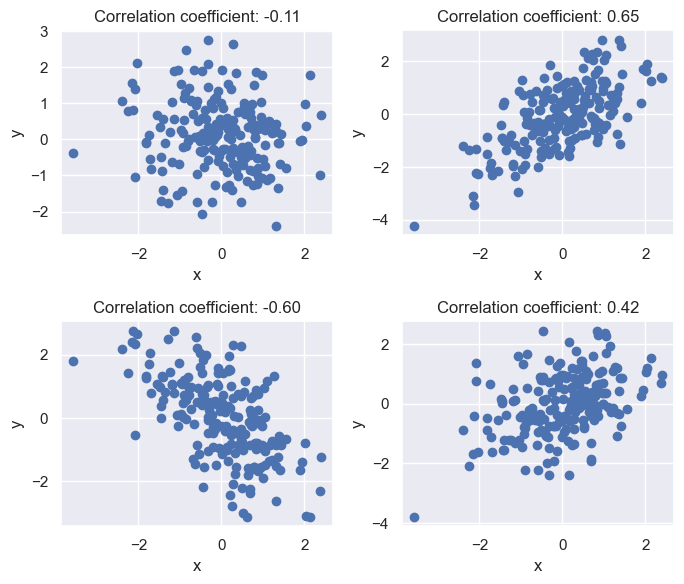

In [135]:
# Create example plots to show trends with different correlation coefficients 

# Set the seed for reproducibility
np.random.seed(1234)

# Generate x and y data
n = 200
x = np.random.randn(n)
y0 = np.random.randn(n)
y1 = 0.8*x + np.random.randn(n)
y2 = -0.8*x + np.random.randn(n)
y3 = 0.4*x + np.random.randn(n)

# Calculate Pearson correlation coefficients
r0 = np.corrcoef(x, y0)[0, 1]
r1 = np.corrcoef(x, y1)[0, 1]
r2 = np.corrcoef(x, y2)[0, 1]
r3 = np.corrcoef(x, y3)[0, 1]

# Create four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
ax = axes.flatten()

# Plot the data and set the axis labels and titles
def set_scatter_plot(ax, x, y, r):
    ax.scatter(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Correlation coefficient: {r:.2f}')

# Plot the data using the set_scatter_plot function
set_scatter_plot(ax[0], x, y0, r0)
set_scatter_plot(ax[1], x, y1, r1)
set_scatter_plot(ax[2], x, y2, r2)
set_scatter_plot(ax[3], x, y3, r3)
 
# Set the layout and show the plot
plt.tight_layout()
plt.show()

---
## Chapter 3. Thinking Probabilistically: Discrete Variables<a class="anchor" id="third-bullet"></a>
---
## 1. Probabilistic logic and statistical inference  
Imagine you measured the petal lengths of 50 flowers of a certain species. Here is the ECDF of those measurements. From what you have just learned, you can compute the mean of those 50 measurements, and I'll annotate it on the ECDF with a vertical line. That is useful, but there are millions of these flowers on the planet. Can you tell me the mean petal length of all of the flowers of that species?

If I measure another 50 flowers, I get a similar, but quantitatively different set of measurements. Can you tell me what value I would get for the mean petal length if I measured yet another 50 flowers? We just don't have the language to do that, without probability. **Probabilistic reasoning allows us to describe uncertainty.** Though you can't tell me exactly what the mean of the next 50 petal lengths you measure will be, you could say that it is more probable to be close to what you got in the first 50 measurements that it is to be much greater. We can go ahead and repeat the measurements over and over again.

We see from the vertical lines that we expect the mean to be somewhere between 4-point-5 and 5 cm. **This is what probabilistic thinking is all about. Given a set of data, you describe probabilistically what you might expect if those data were acquired again and again and again. This is the heart of statistical inference. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again. Your data speak in the language of probability.**

## 2. Random number generators and hacker statistics

## Generating random numbers using the `np.random` module

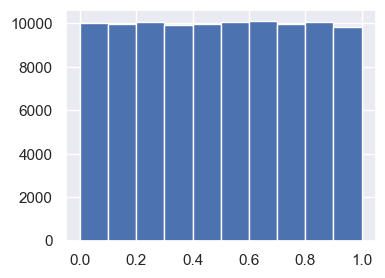

In [137]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
fig = plt.figure(figsize=(4, 3))
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is *almost exactly flat across the top*, indicating that **there is equal chance that a randomly-generated number is in any of the bins of the histogram.**

## The `np.random` module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. **Specifically, each coin flip has a probability of landing heads (success) and probability 
of landing tails (failure).** In this exercise, you will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random() function`, which returns a random number between zero and one.

In [67]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## 🏛💰 Bank loans: How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. **We would like to know the *probability of getting a given number of defaults*, given that the probability of a default is p = 0.05.** To investigate this, you will do a simulation. 
* You will perform 100 Bernoulli trials using the `perform_bernoulli_trials() function` you wrote in the previous exercise and record how many defaults we get. 
* Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) 
* You will do this for another 100 Bernoulli trials. And again and again *until we have tried it 1000 times.*
* Then, you will plot a histogram describing the probability of the number of defaults.

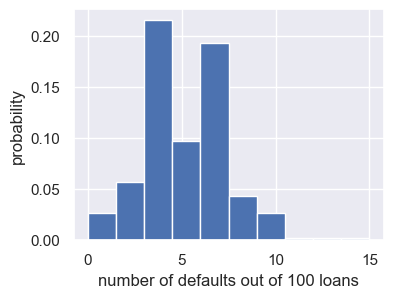

In [139]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    """Compute the number of defaults per 100 loans"""
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; 
fig = plt.figure(figsize=(4, 3))
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

## 🏛💰 Will the bank fail?
Let's plot the number of defaults we got from the previous exercise, in our namespace as n_defaults, as a CDF. The`ecdf() function` we wrote is available. If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

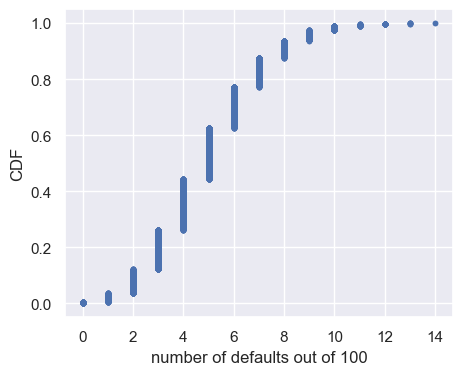

Probability of losing money = 0.0249


In [125]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
fig = plt.figure(figsize=(5, 4))
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## 3. Probability distributions and stories: The Binomial distribution
In the last chapter, we simulated a story about a person flipping a coin. We did this to get the probability for each possible outcome of the story. That set of probabilities is called **a probability mass function (PMF)**. 

* **Probability Mass Function**: the set of probabilities of **discrete** outcomes. 

### Discrete uniform distribution
To understand how this works, consider a simpler story, *a person rolling a die once*. The outcomes are discrete because only certain values may be attained; you cannot roll a 3-point-7 with a die. **Each result has the same, or uniform probability, 1/6.** For this reason, the PMF associated with this story is called the ***Discrete Uniform PMF***. Now the PMF is a property of a discrete probability distribution. **A distribution is just a mathematical description of outcomes.** We can match a story to a mathematical description of probabilities, as we have just seen with the Discrete Uniform distribution.

## Binomial didstribution: the story
* The number *r* of success in *n* Bernoulli trials with probability *p* of success, is Binomially distributed.
* e.g. The number *r* of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed.

## Sampling from the Binomial distribution
We call the function `np.random.binomial` with two arguments, the number of Bernoulli trials (coin flips) and the probability of success (heads). We get 2 heads out of four. We want repeat the four-flip experiment over and over again. Again, we can specify the `size` keyword argument, which tells the function how many random numbers to sample out of the Binomial distribution

In [70]:
print(f'{np.random.binomial(4, 0.5)}\n{np.random.binomial(4, 0.5, size=10)}')

2
[2 2 2 2 2 3 3 2 2 0]


## Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials() function`, but far more computationally efficient. Given this extra efficiency, **we will take 10,000 samples** instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

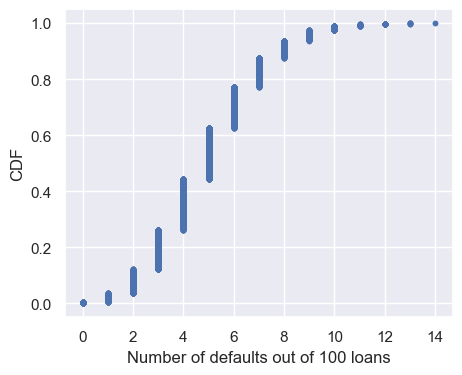

In [124]:
# Seed random number generator
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
fig = plt.figure(figsize=(5, 4))
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()

## Plotting the Binomial PMF
Plotting a nice looking PMF requires a bit of `matplotlib` trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution *as a histogram*. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to `max(n_defaults)` + 1.5. We can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

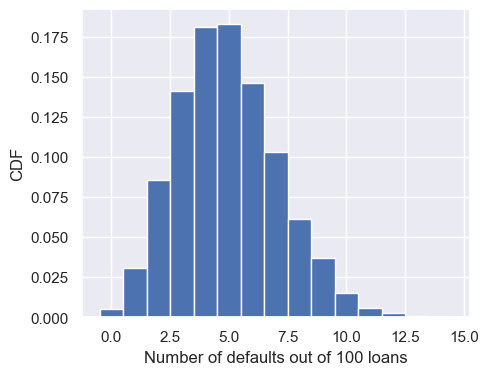

In [122]:
# Compute bin edges: edges
edges = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
fig = plt.figure(figsize=(5, 4))
plt.hist(n_defaults,density=True,bins=edges)

# Label axes
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()

## 4. Poisson processes and the Poisson distribution

* Poisson process: The timing of the next event is completely independent of when the previous event happened. 
* Poisson distribution: The number of arrivals of a Poisson process in a given amount of time is Poisson distributed.
* The Poisson distribution has "one" parameter, **the average number of arrivals (successes) in a given length of time.**

## Relationship between Binomial and Poisson distributions
**The Poisson distribution is a limit of the Binomial distribution for rare events.** This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. 
* **Poisson distribution** with arrival rate *np* $\approx$ **Binomial distribution** for *n* Bernoulli trials with *p* probability of success (with *n* large and *p*small).
* When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval.

Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.  

Let's explore these two distributions computationally. We will 
* Compute the mean and standard deviation of samples from a Poisson distribution **with an arrival rate of 10.** 
* Then, compute the mean and standard deviation of samples from a Binomial distribution with parameters *n* and such *p* that *np=10*. 

In [73]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and **closer to that of the Poisson distribution as the probability *p* gets *lower and lower*.**

---
## Chapter 4. Thinking Probabilistically: Continuous Variables<a class="anchor" id="fourth-bullet"></a>
---

## 1. Probability density functions

So far, we have talked about probabilities of discrete quantities, such as die rolls and number of bus arrivals, but what about continuous quantities? Continuous variables can take on any value, not just discrete ones. To understand what the Normal distribution is, let's consider its probability density function, or PDF. This is **the continuous analog to the probability mass function, the PMF.** 
* **Probability Density Function: Mathematical description of the relative likelihood of observing a value of a continuous variable.**
* The probability is given by **the area under the PDF**.
* On the other hand, the ***CDF*** shows explicitly the probability that the measured quantity will be less than the value on the x-axis.


For example, in the below **PDF** plot, we can see that $x$ is **more likely** to be less than 10 than to be greater than 10. This is because there is **more area** to the left of 10 than to the right. On the right is the **CDF** corresponding to the PDF. Using the CDF, the probability that $x$ is greater than 10 is 0.25.

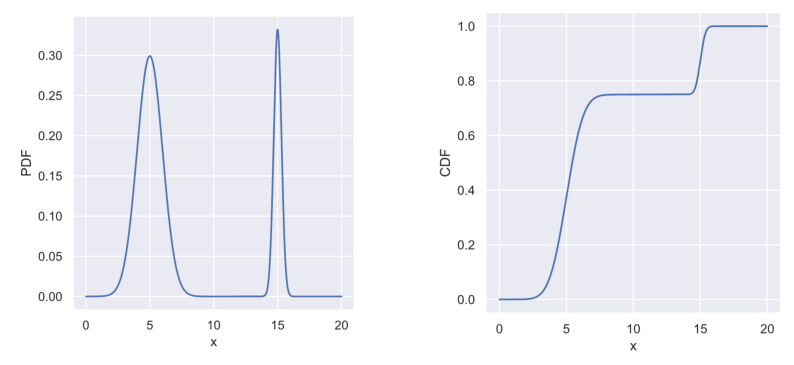

In [74]:
# Load the first image
img1 = mpimg.imread('images/PDF.PNG')

# Load the second image
img2 = mpimg.imread('images/CDF.PNG')

# Display the two images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img1)
ax[1].imshow(img2)

# Remove the axis labels
ax[0].axis('off')
ax[1].axis('off')

# Show the plot
plt.show()

## 2. Normal distribution
## The Normal PDF
In this exercise, we will explore the **Normal PDF** and also learn a way to **plot a PDF of a known distribution using *hacker statistics*.** Specifically, we will plot a Normal PDF for various values of the variance. We can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

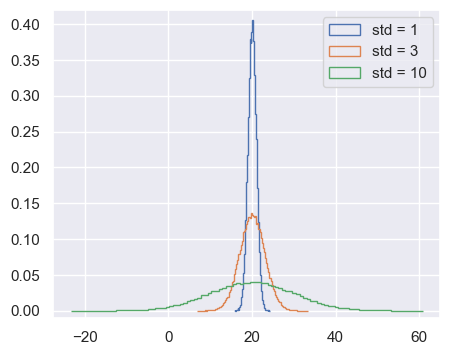

In [121]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
fig = plt.figure(figsize=(5, 4))
plt.hist(samples_std1, density=True, histtype='step', bins=100)
plt.hist(samples_std3, density=True, histtype='step', bins=100)
plt.hist(samples_std10, density=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF
Now that we have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples we generated in the last exercise (as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the CDFs. The plot presents that the CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

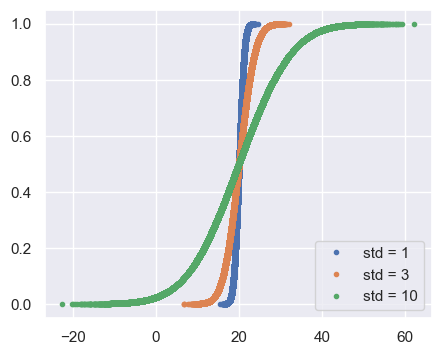

In [120]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
fig = plt.figure(figsize=(5, 4))
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## 3. The Exponential distribution  
Just as there are many named discrete distribution, there are many named continuous distributions as well. For example, let's take a another trip to Poissonville and stand at a bus stop. We know that **the "number" of buses** that will arrive per hour are **Poisson distributed**. But **the amount of "*time*" between arrivals of buses is *Exponentially* distributed.**

* The **Exponential distribution** describes the **waiting times between rare events**.

The Exponential distribution has this story: the waiting time between arrivals of a Poisson process are exponentially distributed. It has a **single parameter**, the*mean* waiting time. This distribution is not peaked, as we can see from its PDF. The Exponential and Normal are just two of many examples of continuous distributions. **Importantly, in many cases you can just simulate your story to get the CDF.** Remember, you have the power of a computer. If you can simulate a story, you can get its distribution!

## If you have a story, you can simulate it!: ⚾Distribution of no-hitters and cycles
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this exercise.  

In earlier exercises, we looked at the *rare event of no-hitters in Major League Baseball*. **Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event.** Like no-hitters, **this can be modeled as a "Poisson process"**, so the "time between hits of the cycle" are also "Exponentially distributed".  

**How long must we wait to see a no-hitter and then a batter hit the cycle?** The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

* First, we write a function to sample out of the distribution described by this story.
* Next, we use our sampling function to *compute the waiting time to observe a no-hitter and hitting of the cycle.* 
* The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

In [152]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

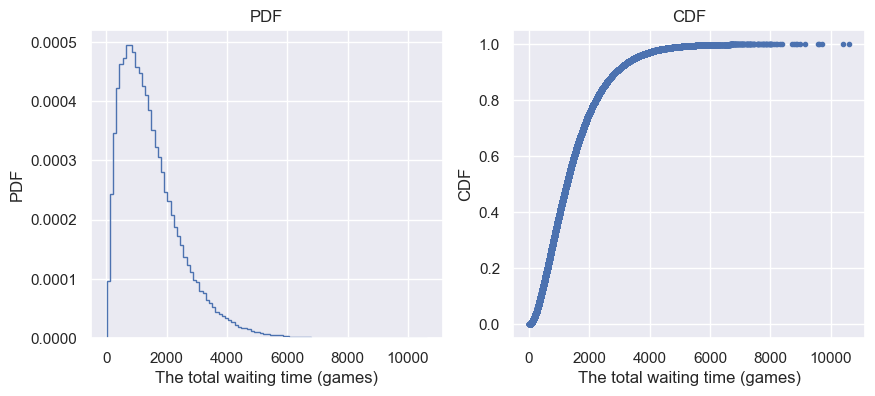

In [153]:
# 1. Generate PDF: Draw samples of waiting times: waiting_times
# 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
waiting_times = successive_poisson(764, 715, 100000)

# 2. Generate CDF
x, y = ecdf(waiting_times)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data on each subplot
axs[0].hist(waiting_times, density=True, bins=100, histtype='step')
axs[0].set_title('PDF')
axs[0].set_xlabel('The total waiting time (games)')
axs[0].set_ylabel('PDF')

axs[1].plot(x, y, marker='.', linestyle='none')
axs[1].set_title('CDF')
axs[1].set_xlabel('The total waiting time (games)')
axs[1].set_ylabel('CDF')

# Display the plot
plt.show()

The CDF says that we need to wait at least 2000 games to see a no-hitter and then a batter hit the cycle with 80% of the probability.

---
## Chapter 5. Final Thoughts<a class="anchor" id="fifth-bullet"></a>
---
We can now use Python to construct instructive plots and informative summary statistics to explore data. We have also built the intellectual and computational infrastructure to think probabilistically. 

### Now we can
* Construct instructive plots
* Compute informative summary statistics
* Use hacker statistics
* Think probabilistically  

The knowledge we learned in this course really shines when we directly apply it to statistical inference problems. In the Part 2,

### In the sequel, we will
* Estimate parameter values
* Perform linear regressions
* Compute confidence interval
* Perform hypothesis testing

we will work with real data sets in Python to infer parameter values by a variety of methods including linear regression. We will use hacker statistics to compute confidence intervals to help you couch the conclusions you draw from your data in the appropriate probabilistic language. You will perform hypothesis tests, such as A/B tests, to help you discern differences between data sets. It's a great opportunity to use and expand upon what we learned here in this first part in statistical thinking. I encourage you to take that opportunity! See you there!